In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Uploading Data**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/population_data.csv', encoding='latin-1')
dataset.head()


,MUNICIPALITY REFNIS CODE,MUNICIPALITY NAME,DISTRICT REFNIS CODE,DISTRICT NAME,PROVINCE REFNIS CODE,PROVINCE NAME,REGION REFNIS CODE,REGION NAME,GENDER,NATIONALITY,CIVIL CODE STATUS,AGE,POPULATION
0,71024,Herk-de-Stad,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,39,42
1,71037,Lummen,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,M,Belgian,Married,82,24
2,71011,Diepenbeek,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,42,51
3,71016,Genk,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,M,Belgian,Married,63,277
4,71017,Gingelom,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,30,14


**Exploring data**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465418 entries, 0 to 465417
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MUNICIPALITY REFNIS CODE  465418 non-null  int64  
 1   MUNICIPALITY NAME         465418 non-null  object 
 2   DISTRICT REFNIS CODE      465418 non-null  int64  
 3   DISTRICT NAME             465418 non-null  object 
 4   PROVINCE REFNIS CODE      443993 non-null  float64
 5   PROVINCE NAME             443993 non-null  object 
 6   REGION REFNIS CODE        465418 non-null  int64  
 7   REGION NAME               465418 non-null  object 
 8   GENDER                    465418 non-null  object 
 9   NATIONALITY               465418 non-null  object 
 10  CIVIL CODE STATUS         465418 non-null  object 
 11  AGE                       465418 non-null  int64  
 12  POPULATION                465418 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory us

In [5]:
dataset.describe()

,MUNICIPALITY REFNIS CODE,DISTRICT REFNIS CODE,PROVINCE REFNIS CODE,REGION REFNIS CODE,AGE,POPULATION
count,465418.000000,465418.000000,443993.000000,465418.000000,465418.000000,465418.000000
mean,45795.085029,45754.592646,43842.168913,2517.923673,52.607527,24.442695
std,23956.614057,23950.946921,24106.756939,584.591526,23.467469,63.746827
min,11001.000000,11000.000000,10000.000000,2000.000000,0.000000,1.000000
25%,24033.000000,24000.000000,20002.000000,2000.000000,35.000000,2.000000
50%,44043.000000,44000.000000,40000.000000,2000.000000,53.000000,7.000000
75%,63035.000000,63000.000000,60000.000000,3000.000000,71.000000,25.000000
max,93090.000000,93000.000000,90000.000000,4000.000000,100.000000,2936.000000


**Handle Missing Data**

In [6]:
dataset.isna()
print(dataset)

        MUNICIPALITY REFNIS CODE MUNICIPALITY NAME  DISTRICT REFNIS CODE  \
0                          71024      Herk-de-Stad                 71000   
1                          71037            Lummen                 71000   
2                          71011        Diepenbeek                 71000   
3                          71016              Genk                 71000   
4                          71017          Gingelom                 71000   
...                          ...               ...                   ...   
465413                     92141        La Bruyère                 92000   
465414                     46024           Stekene                 46000   
465415                     46024           Stekene                 46000   
465416                     46024           Stekene                 46000   
465417                     92141        La Bruyère                 92000   

        DISTRICT NAME  PROVINCE REFNIS CODE     PROVINCE NAME  \
0             Hasselt 

In [7]:
(dataset.isna()).value_counts()

MUNICIPALITY REFNIS CODE  MUNICIPALITY NAME  DISTRICT REFNIS CODE  DISTRICT NAME  PROVINCE REFNIS CODE  PROVINCE NAME  REGION REFNIS CODE  REGION NAME  GENDER  NATIONALITY  CIVIL CODE STATUS  AGE    POPULATION
False                     False              False                 False          False                 False          False               False        False   False        False              False  False         443993
                                                                                  True                  True           False               False        False   False        False              False  False          21425
Name: count, dtype: int64

In [8]:
dataset.isna()

,MUNICIPALITY REFNIS CODE,MUNICIPALITY NAME,DISTRICT REFNIS CODE,DISTRICT NAME,PROVINCE REFNIS CODE,PROVINCE NAME,REGION REFNIS CODE,REGION NAME,GENDER,NATIONALITY,CIVIL CODE STATUS,AGE,POPULATION
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465413,False,False,False,False,False,False,False,False,False,False,False,False,False
465414,False,False,False,False,False,False,False,False,False,False,False,False,False
465415,False,False,False,False,False,False,False,False,False,False,False,False,False
465416,False,False,False,False,False,False,False,False,False,False,False,False,False


**Visualisation**

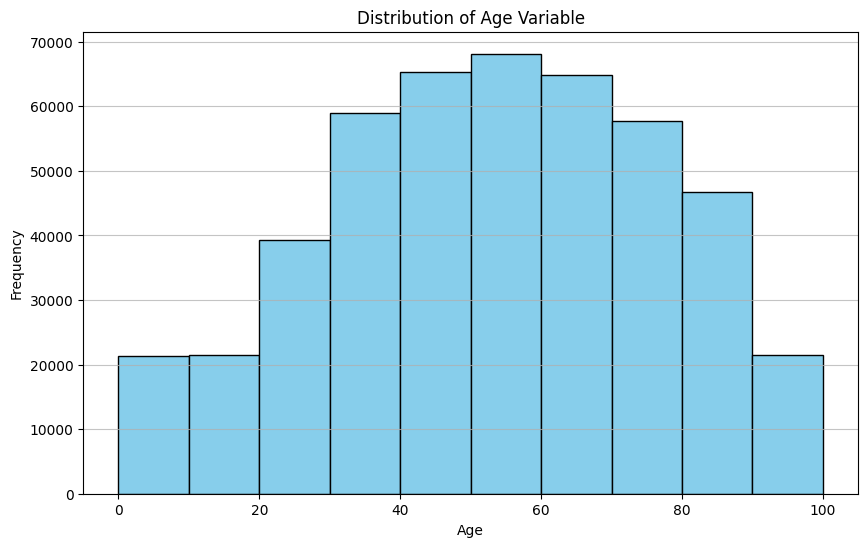

In [9]:
dataset = pd.DataFrame(dataset)
plt.figure(figsize=(10, 6))
plt.hist(dataset['AGE'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Variable')
plt.grid(axis='y', alpha=0.75)
plt.show()

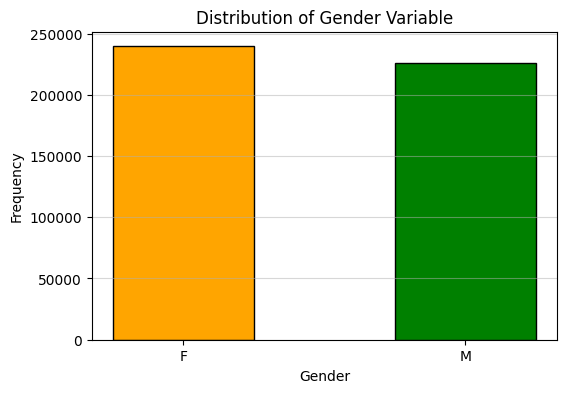

In [10]:
dataset = pd.DataFrame(dataset)
plt.figure(figsize=(6, 4))
gender_counts = dataset['GENDER'].value_counts()
bar_width = 0.5
plt.bar(gender_counts.index, gender_counts, width=bar_width, color=['orange', 'green'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender Variable')
plt.grid(axis='y', alpha=0.5)
plt.show()

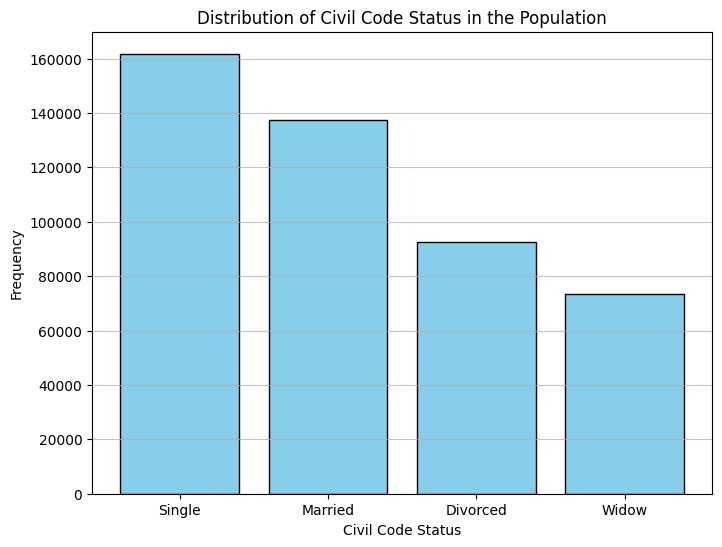

In [12]:
plt.figure(figsize=(8, 6))
civil_code_counts = dataset['CIVIL CODE STATUS'].value_counts()
plt.bar(civil_code_counts.index, civil_code_counts, color='skyblue', edgecolor='black')
plt.xlabel('Civil Code Status')
plt.ylabel('Frequency')
plt.title('Distribution of Civil Code Status in the Population')
plt.grid(axis='y', alpha=0.75)
plt.show()

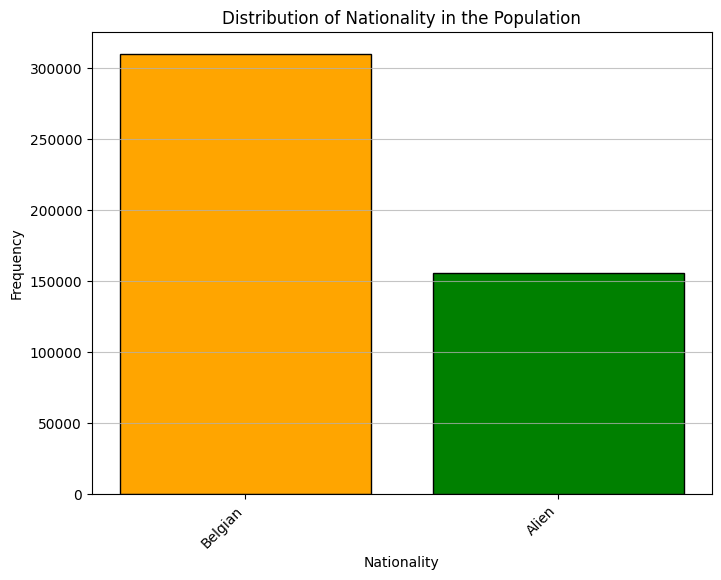

In [13]:
plt.figure(figsize=(8, 6))
nationality_counts = dataset['NATIONALITY'].value_counts()
plt.bar(nationality_counts.index, nationality_counts, color=['orange', 'green'], edgecolor='black')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.title('Distribution of Nationality in the Population')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45, ha='right')
plt.show()

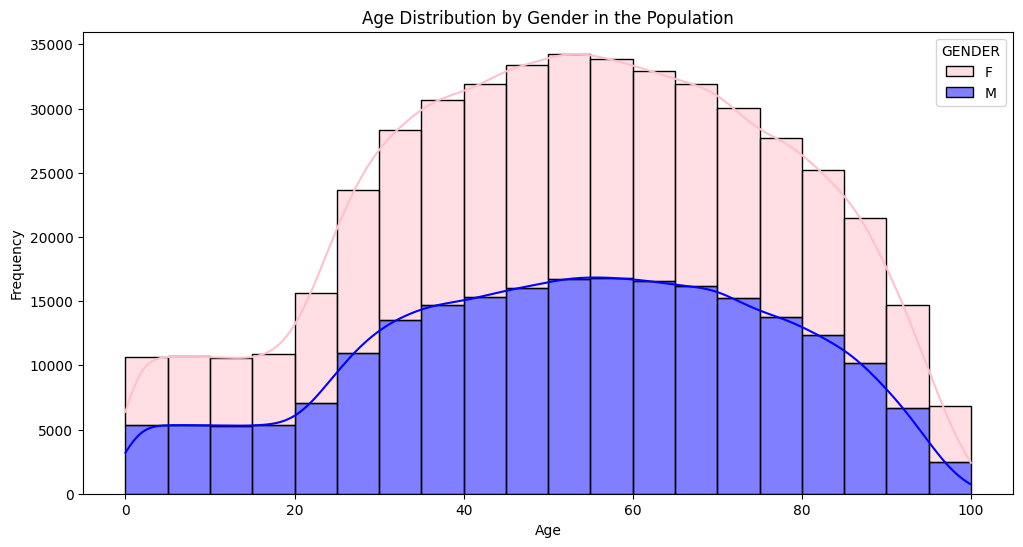

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='AGE', hue='GENDER', bins=20, kde=True, multiple='stack', palette={'M': 'blue', 'F': 'pink'})
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender in the Population')
plt.show()

In [15]:
dataset.nunique()

MUNICIPALITY REFNIS CODE     589
MUNICIPALITY NAME            589
DISTRICT REFNIS CODE          43
DISTRICT NAME                 43
PROVINCE REFNIS CODE          10
PROVINCE NAME                 10
REGION REFNIS CODE             3
REGION NAME                    3
GENDER                         2
NATIONALITY                    2
CIVIL CODE STATUS              4
AGE                          101
POPULATION                  1115
dtype: int64

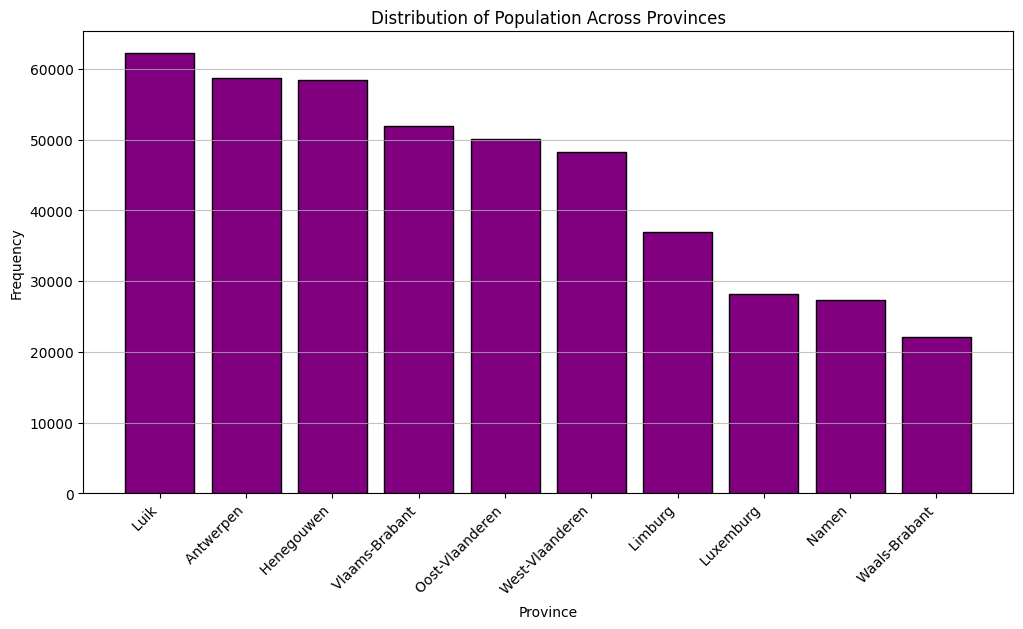

In [16]:
plt.figure(figsize=(12, 6))
province_counts = dataset['PROVINCE NAME'].value_counts()
plt.bar(province_counts.index, province_counts, color='purple', edgecolor='black')
plt.xlabel('Province')
plt.ylabel('Frequency')
plt.title('Distribution of Population Across Provinces')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45, ha='right')
plt.show()

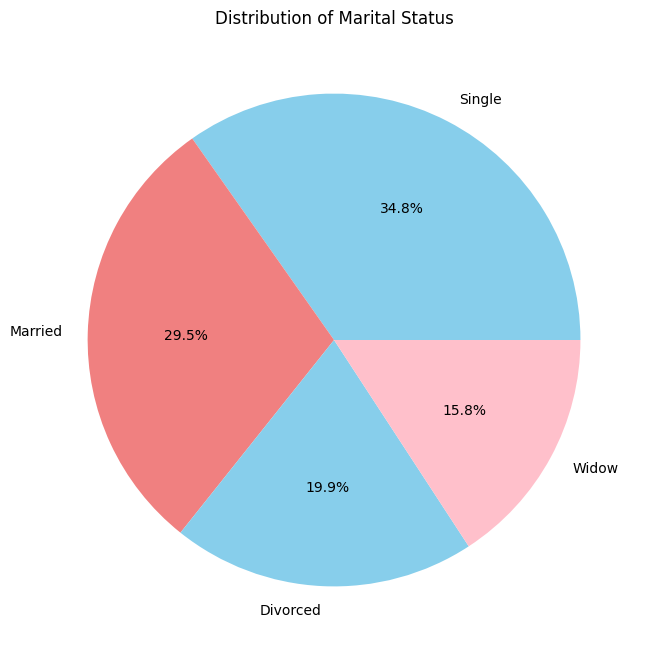

In [17]:
marital_status_counts = dataset['CIVIL CODE STATUS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', colors=['skyblue','lightcoral','skyblue','pink'])
plt.title('Distribution of Marital Status')
plt.show()